## Teste Z de duas amostras

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import weightstats

In [93]:
df = pd.read_csv('Two_Machines.csv')

In [94]:
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [95]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


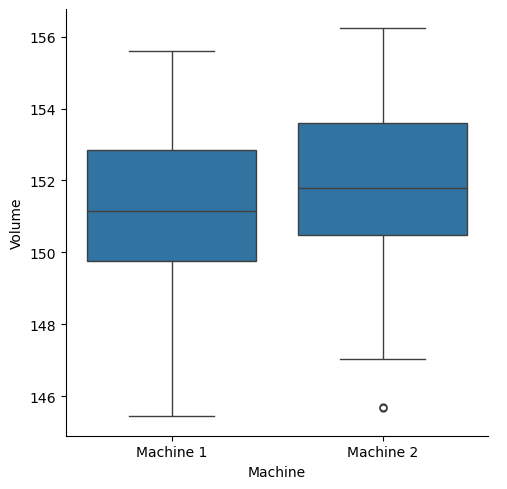

In [96]:
sns.catplot(data=df, x='Machine', y='Volume', kind='box')
plt.show()

Vamos agora fazer o teste Z para as duas máquinas (Teste Z de duas amostras). \
Começamos filtrando os volumes da Máquina 1.

In [97]:
m1 = df[df['Machine'] == 'Machine 1']['Volume']

In [98]:
m2 = df[df['Machine'] == 'Machine 2']['Volume']

H0: u1 = u2 \
Ha: u1 <> u2

In [99]:
weightstats.ztest(m1, m2)

(-2.189406040190184, 0.02856734103261826)

Como P Value < 0.5, rejeitamos a hipótese nula. Portanto, as máquinas estão produzindo com médias diferentes.

### Exercício 1 


A biblioteca Seaborn tem vários "built-in" datasets.

In [100]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [101]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Primeiro é necessário verificar se há no mínimo 30 amostras para que seja possível realizar o teste Z.

In [102]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Podemos obter maiores informações sobre o nosso dataset usando a função describe e plotando um gráfico.

In [103]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Vamos plotar um boxplot para observar como as gorjetas estão distribuídas entre homens e mulheres.

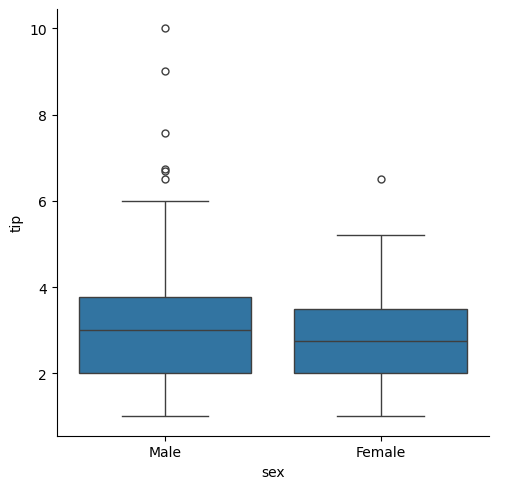

In [104]:
sns.catplot(data=tips, x='sex', y='tip', kind='box')
plt.show()

Para realizar nosso Teste Z, a primeira coisa a fazer é filtrar as gorjetas por sexo.

In [105]:
tm = tips[tips['sex'] == 'Male']['tip']
tf = tips[tips['sex'] == 'Female']['tip']

H0: u(tm) == u(tf) \
Ha: u(tm) <> u(tf)

In [106]:
weightstats.ztest(tm, tf)

(1.3878597054212687, 0.1651797698624794)

Como P Value > 0,05, falhamos em rejeitar a hipótese nula, portanto as gorjetas de homens e mulheres são iguais.

### Exercício 2: Lunch vs Dinner

Realize um teste de hipótese que verifica se as gorjetas dadas no almoço são iguais às gorjetas dadas no jantar.

In [107]:
tl = tips[tips['time'] == 'Lunch']['tip']
td = tips[tips['time'] == 'Dinner']['tip']

H0: u(tl) == u(td) \
Ha: u(tl) <> u(td)

In [108]:
weightstats.ztest(tl, td)

(-1.9062569301202392, 0.056616879252225666)

Como pValue > 0.05, falhamos em rejeitar H0. Portanto, as gorjetas dadas no almoço tem a mesma média das gorjetas do jantar.

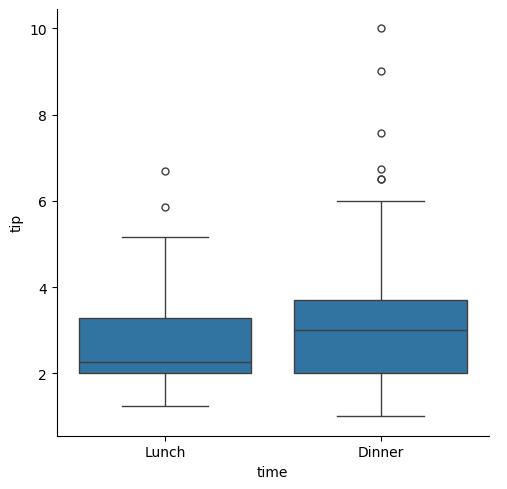

In [109]:
sns.catplot(data=tips, x='time', y='tip', kind='box')
plt.show()

## Teste t de duas amostras

Exemplo 1: Amostras envasadas por duas máquinas apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina B: 156, 155, 158, 155, 154 \
A média é diferente? Calcular com 95% de confiança.

In [110]:
m1 = [150, 152, 154, 152, 151]
m2 = [156, 155, 158, 155, 154]

H0: μ1 = μ2 \
Ha: μ1 ≠ μ2

In [111]:
stats.ttest_ind(m1, m2, equal_var=True)

TtestResult(statistic=-4.005551702879929, pvalue=0.003919295477128331, df=8.0)

Como P Value < 0,05, rejeitamos a hipótese nula. Portanto máquinas estão envazando com médias diferentes.

Exemplo 2: Amostras envasadas por duas máquinas têm apresentam os seguintes volumes: \
Máquina A: 150, 152, 154, 152, 151 \
Máquina C: 144, 162, 177, 150, 140 \
A média é diferente? Calcular com 95% de confiança.

H0: μ1 = μ3 \
Ha: μ1 ≠ μ3

In [112]:
m3 = [144, 162, 177, 150, 140]

In [113]:
stats.ttest_ind(m1, m3, equal_var=False)

TtestResult(statistic=-0.4146442144313621, pvalue=0.699289145758865, df=4.077937685622884)

Como P Value > 0,05, falhamos em rejeitar a hipótese nula. Portanto, as máquinas estão produzindo com mesma média =>  μ(m1) = μ(m2).

## Exercício 3
Utilizando o dataset Titanic, realize um teste de hipótese que verifica se as médias das idades de homens e mulheres que sobreviveram à tragédia do Titanic são iguais. \
Importante: use df.dropna(subset = ['age'], inplace=True) para excluir os registros quem contém NaN na coluna 'age'.

H0: μM = μF \
Ha: μM ≠ μF

In [114]:
dfTitanic = sns.load_dataset('titanic')
dfTitanic.dropna(subset=['age'], inplace=True)
dfTitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [115]:
dfMale = dfTitanic[(dfTitanic['sex'] == 'male') & (dfTitanic['survived'] == 1)]['age']
dfFemale = dfTitanic[(dfTitanic['sex'] == 'female') & (dfTitanic['survived'] == 1)]['age']

In [116]:
print(dfMale.describe())
print(dfFemale.describe())

count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: age, dtype: float64
count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: age, dtype: float64


In [117]:
weightstats.ztest(dfMale, dfFemale)

(-0.8351170125126802, 0.40365182882615236)

Como pValue > 0.05, falhamos em rejeitar H0. Portanto, a média de idade de homens é igual a média de idade das mulheres sobreviventes.

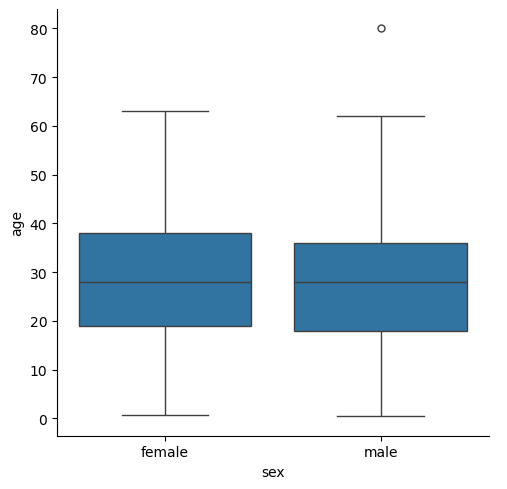

In [119]:
dfSurvivors = dfTitanic[dfTitanic['survived'] == 1]
sns.catplot(data=dfSurvivors, x='sex', y='age', kind='box')
plt.show()